# Exercise
### The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function

In [125]:
from sklearn.datasets import fetch_olivetti_faces
# avoid ssl error
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

olivetti = fetch_olivetti_faces()
print(olivetti)

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32), 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
         0.3305785 , 0.30578512],
        [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
         0.338843  , 0.3140496 ],
        [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
         0.338843  , 0.29752067],
        ...,
        [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
         0.16528925, 0.17

In [126]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(sss.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

#### Exercise: Next, cluster the images using K-Means, and ensure that you have a good number of clusters

In [127]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
squared_clusters = []
k_range = range(5, 200, 5)
for i in k_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train)
    squared_clusters.append(kmeans)

squared_clusters


[KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=10, random_state=42),
 KMeans(n_clusters=15, random_state=42),
 KMeans(n_clusters=20, random_state=42),
 KMeans(n_clusters=25, random_state=42),
 KMeans(n_clusters=30, random_state=42),
 KMeans(n_clusters=35, random_state=42),
 KMeans(n_clusters=40, random_state=42),
 KMeans(n_clusters=45, random_state=42),
 KMeans(n_clusters=50, random_state=42),
 KMeans(n_clusters=55, random_state=42),
 KMeans(n_clusters=60, random_state=42),
 KMeans(n_clusters=65, random_state=42),
 KMeans(n_clusters=70, random_state=42),
 KMeans(n_clusters=75, random_state=42),
 KMeans(n_clusters=80, random_state=42),
 KMeans(n_clusters=85, random_state=42),
 KMeans(n_clusters=90, random_state=42),
 KMeans(n_clusters=95, random_state=42),
 KMeans(n_clusters=100, random_state=42),
 KMeans(n_clusters=105, random_state=42),
 KMeans(n_clusters=110, random_state=42),
 KMeans(n_clusters=115, random_state=42),
 KMeans(n_clusters=120, random_state=42),
 KMeans(n_cl

In [128]:
from sklearn.metrics import silhouette_score
import numpy as np
ss_scores = [silhouette_score(X_train, model.labels_) for model in squared_clusters]

best_score_index = np.argmax(ss_scores)
best_k_range = k_range[best_score_index]
best_score = ss_scores[best_score_index]

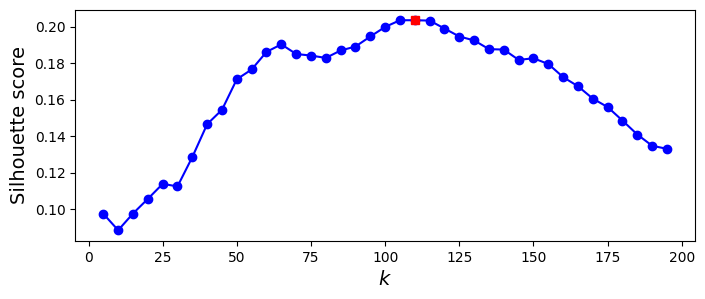

In [129]:
plt.figure(figsize=(8,3))
plt.plot(k_range, ss_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k_range, best_score, 'rs')
plt.show()

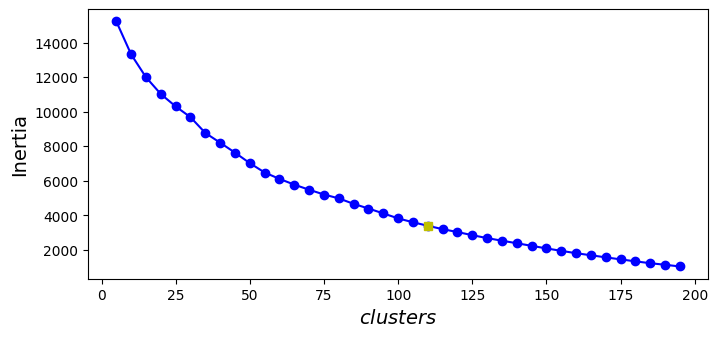

In [130]:
inertias = [model.inertia_ for model in squared_clusters]
best_inertia = inertias[best_score_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$clusters$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k_range, best_inertia, "ys")
plt.show()

In [131]:
best_k_range

110

In [132]:
best_model = squared_clusters[best_score_index]

### Visualize the clusters:

cluster_id 0


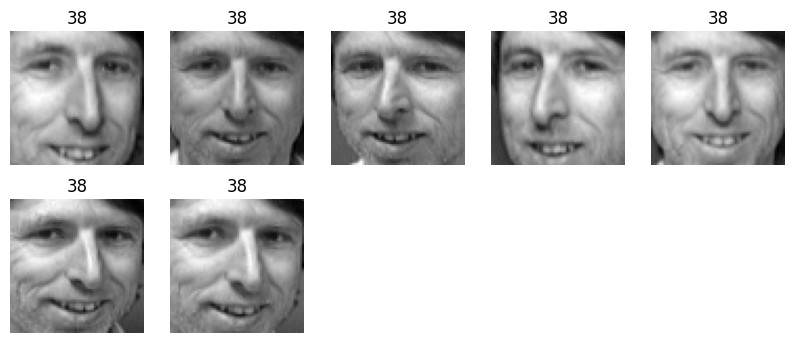

cluster_id 1


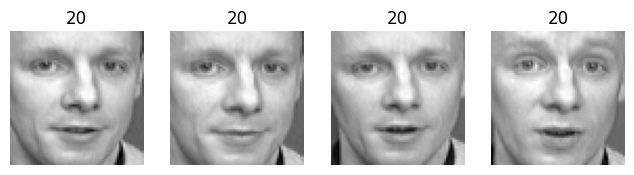

cluster_id 2


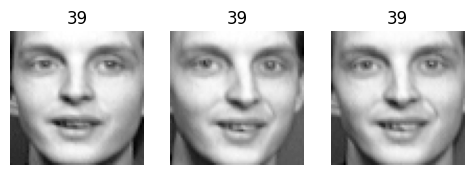

cluster_id 3


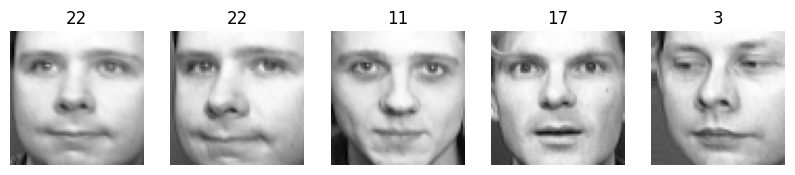

cluster_id 4


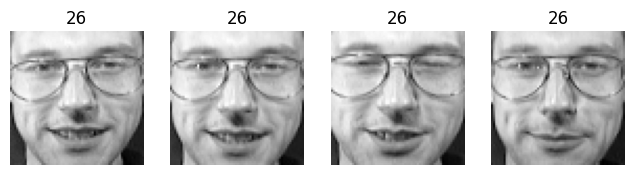

cluster_id 5


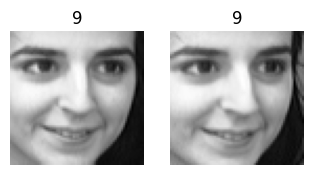

cluster_id 6


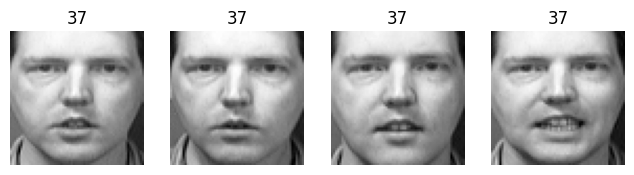

cluster_id 7


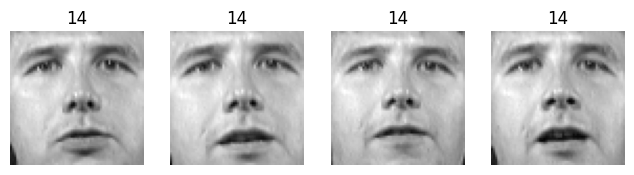

cluster_id 8


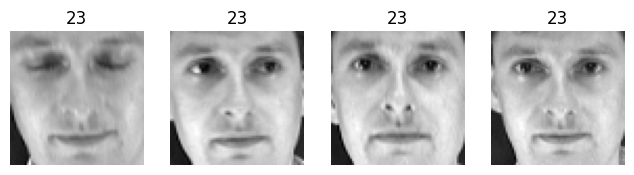

cluster_id 9


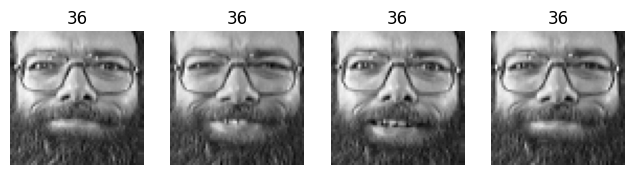

cluster_id 10


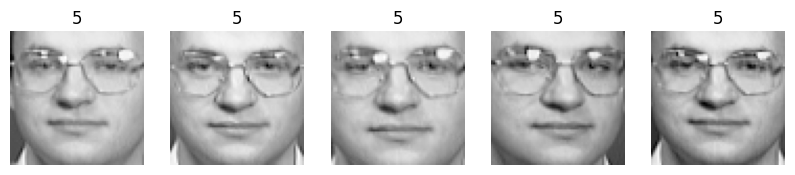

cluster_id 11


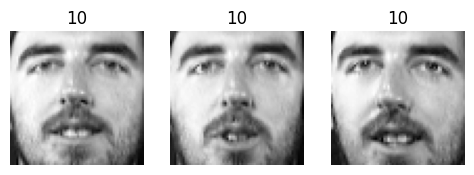

cluster_id 12


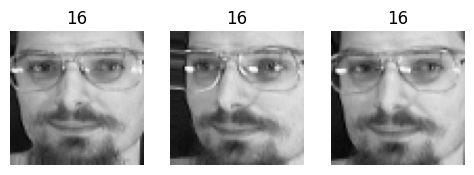

cluster_id 13


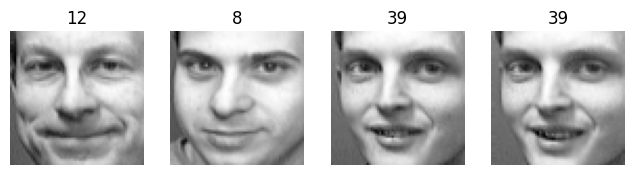

cluster_id 14


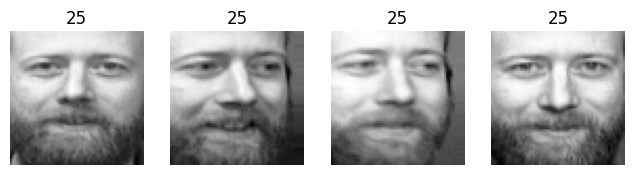

cluster_id 15


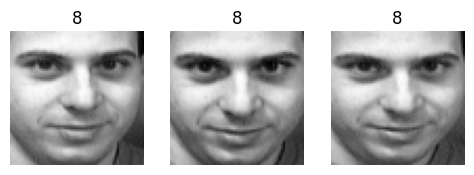

cluster_id 16


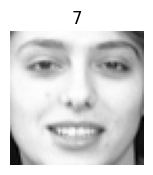

cluster_id 17


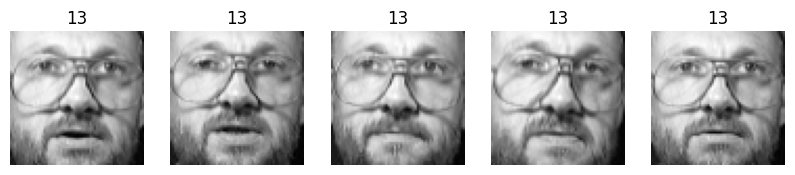

cluster_id 18


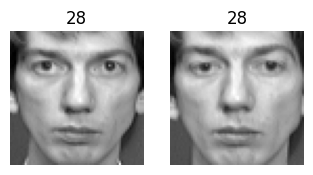

cluster_id 19


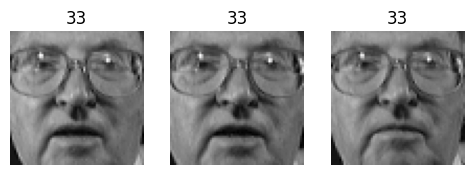

cluster_id 20


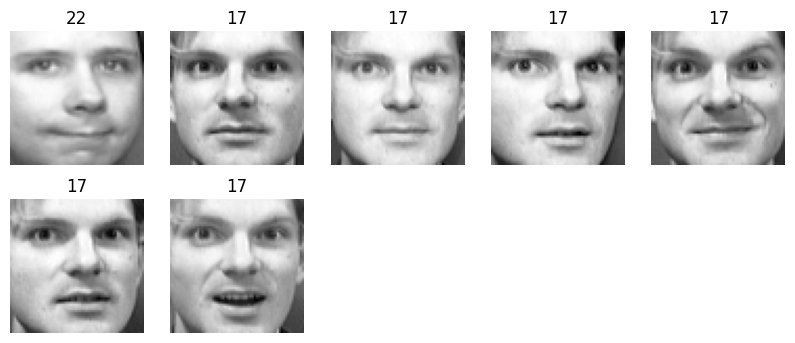

cluster_id 21


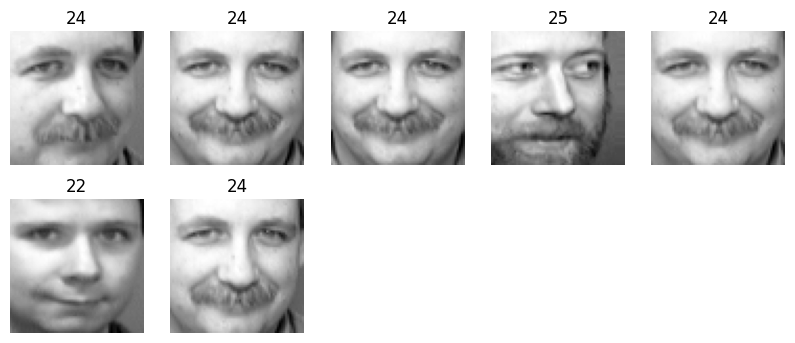

cluster_id 22


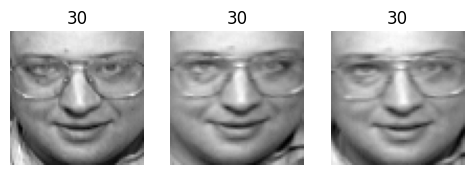

cluster_id 23


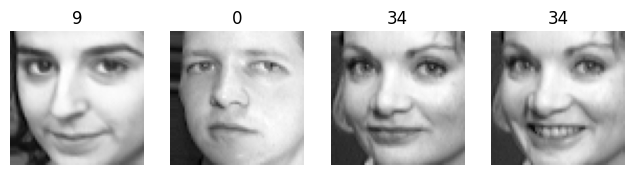

cluster_id 24


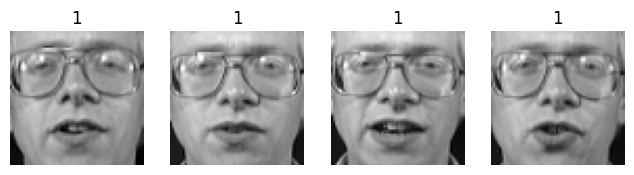

cluster_id 25


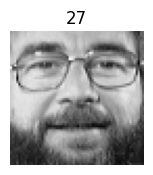

cluster_id 26


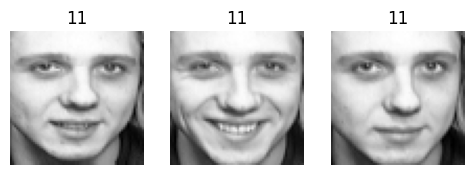

cluster_id 27


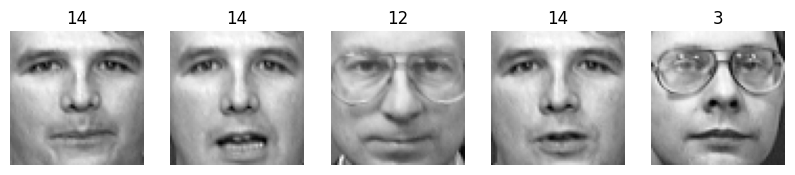

cluster_id 28


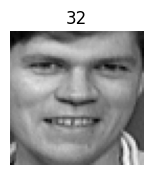

cluster_id 29


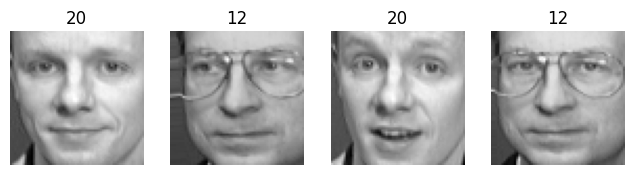

cluster_id 30


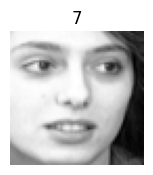

cluster_id 31


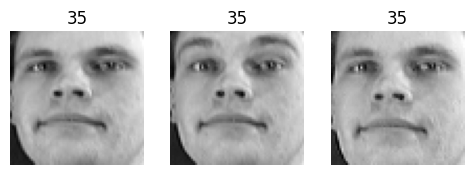

cluster_id 32


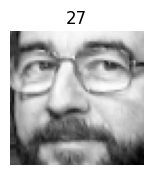

cluster_id 33


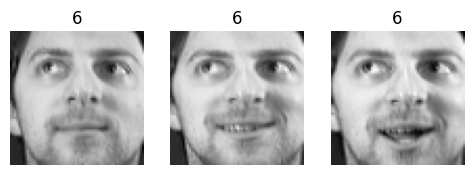

cluster_id 34


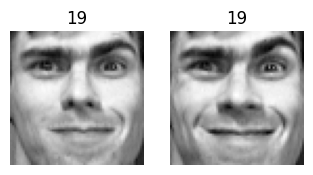

cluster_id 35


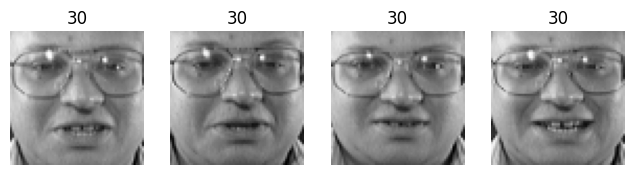

cluster_id 36


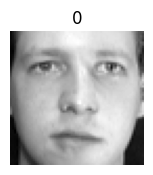

cluster_id 37


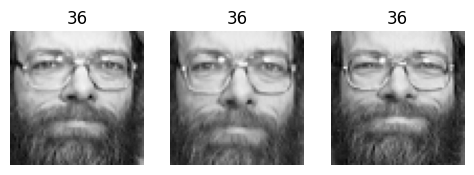

cluster_id 38


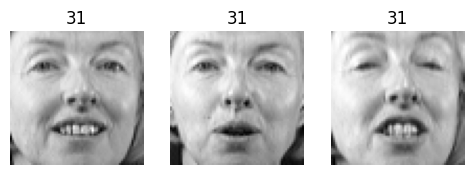

cluster_id 39


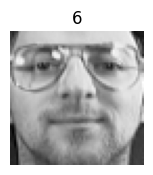

cluster_id 40


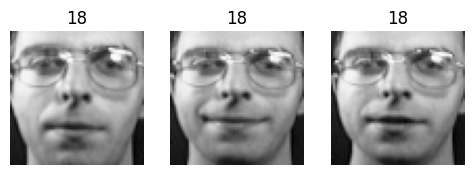

cluster_id 41


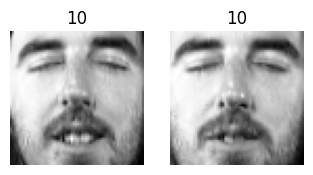

cluster_id 42


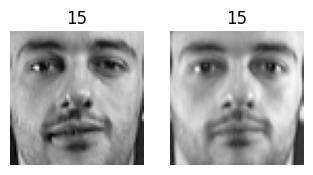

cluster_id 43


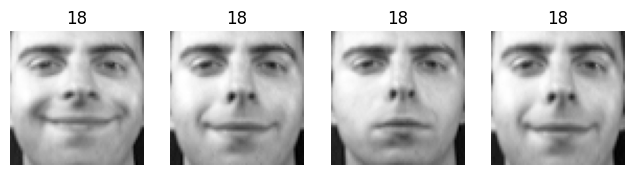

cluster_id 44


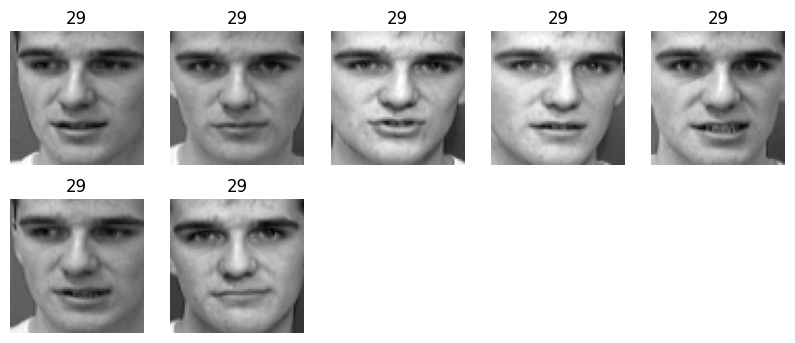

cluster_id 45


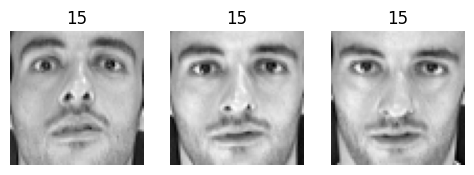

cluster_id 46


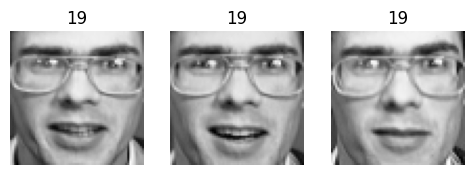

cluster_id 47


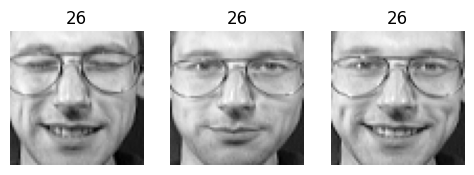

cluster_id 48


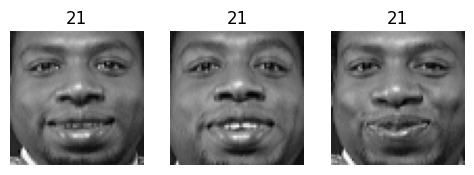

cluster_id 49


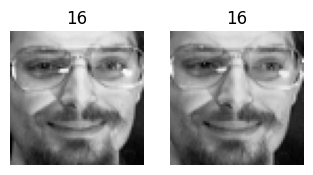

cluster_id 50


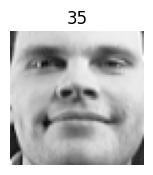

cluster_id 51


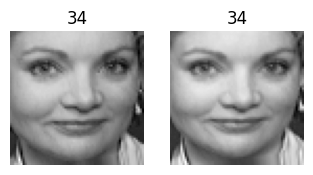

cluster_id 52


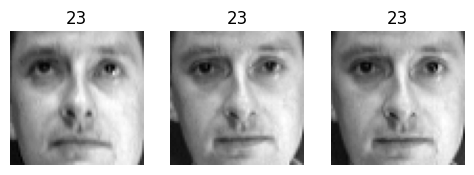

cluster_id 53


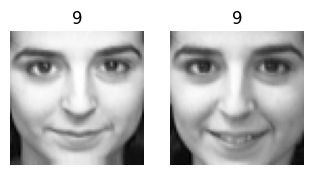

cluster_id 54


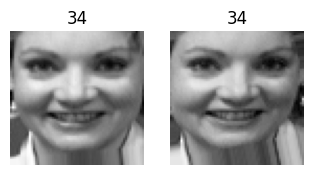

cluster_id 55


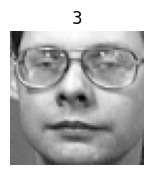

cluster_id 56


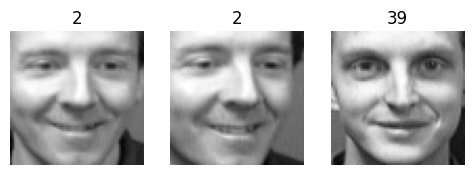

cluster_id 57


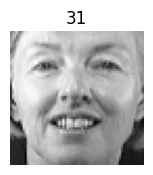

cluster_id 58


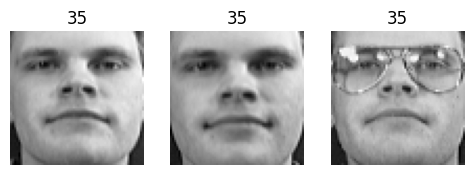

cluster_id 59


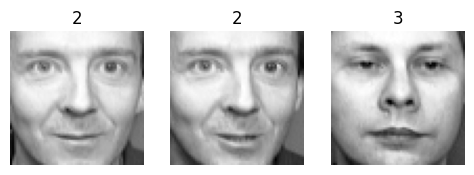

cluster_id 60


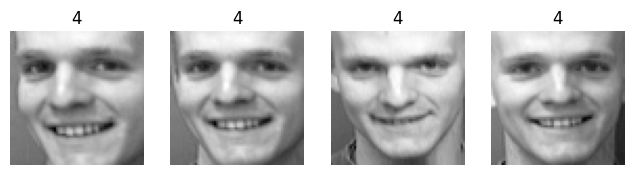

cluster_id 61


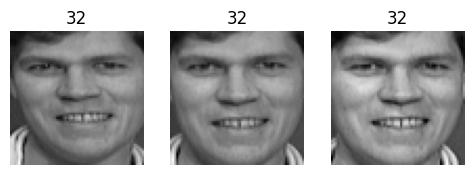

cluster_id 62


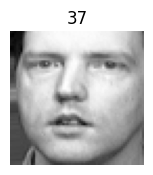

cluster_id 63


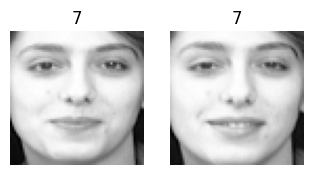

cluster_id 64


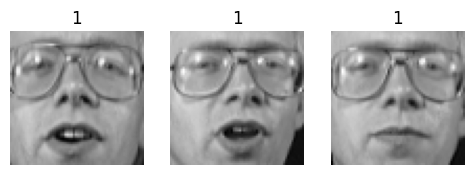

cluster_id 65


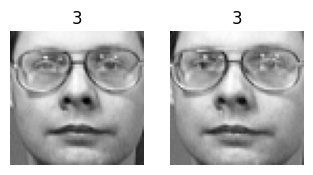

cluster_id 66


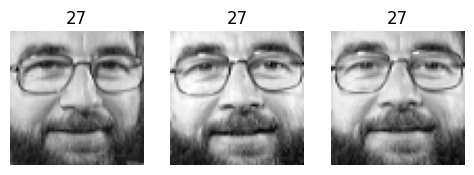

cluster_id 67


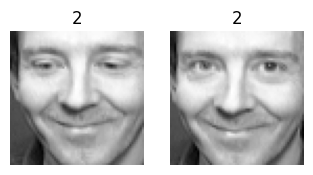

cluster_id 68


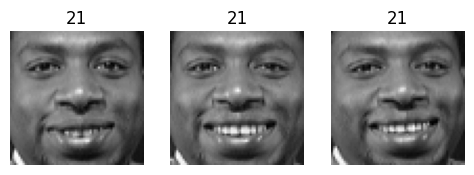

cluster_id 69


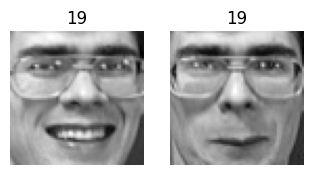

cluster_id 70


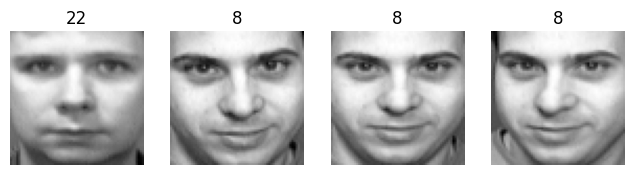

cluster_id 71


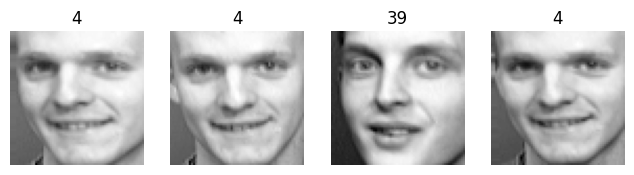

cluster_id 72


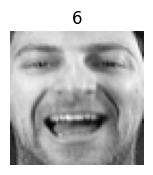

cluster_id 73


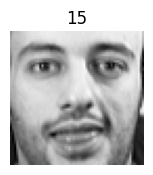

cluster_id 74


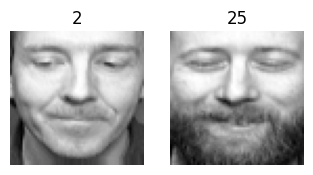

cluster_id 75


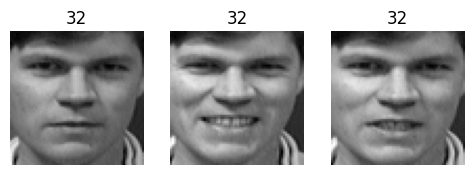

cluster_id 76


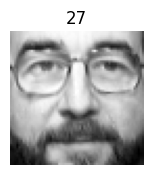

cluster_id 77


cluster_id 78


cluster_id 79


cluster_id 80


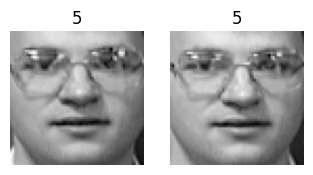

cluster_id 81


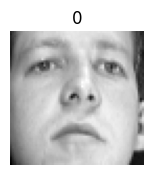

cluster_id 82


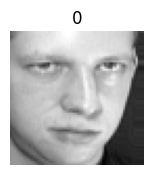

cluster_id 83


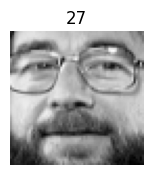

cluster_id 84


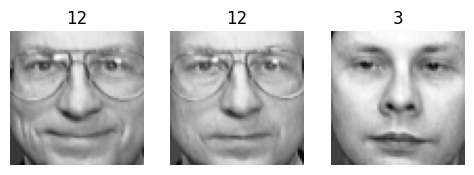

cluster_id 85


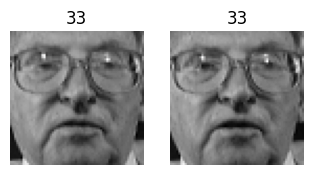

cluster_id 86


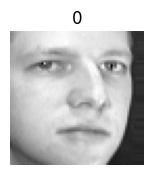

cluster_id 87


cluster_id 88


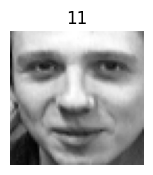

cluster_id 89


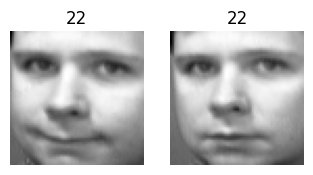

cluster_id 90


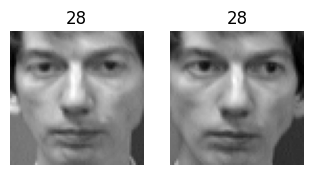

cluster_id 91


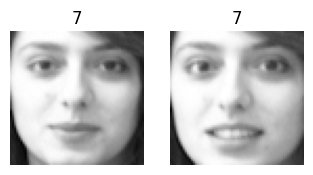

cluster_id 92


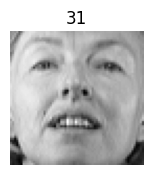

cluster_id 93


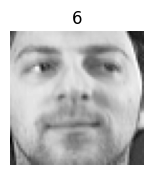

cluster_id 94


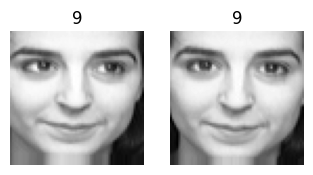

cluster_id 95


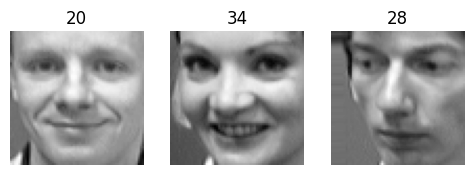

cluster_id 96


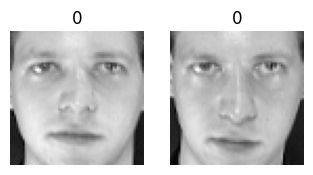

cluster_id 97


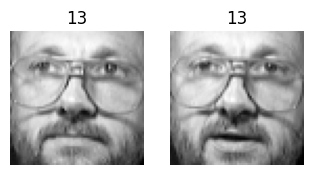

cluster_id 98


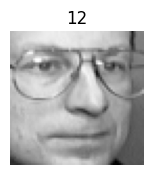

cluster_id 99


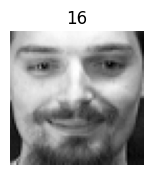

cluster_id 100


cluster_id 101


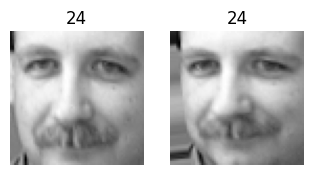

cluster_id 102


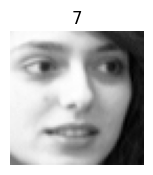

cluster_id 103


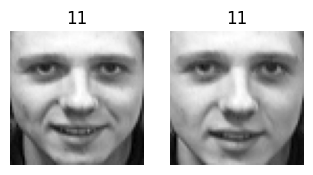

cluster_id 104


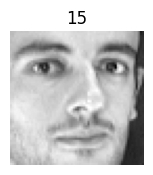

cluster_id 105


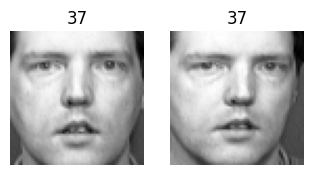

cluster_id 106


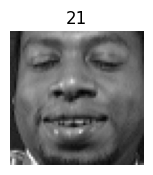

cluster_id 107


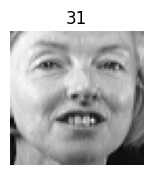

cluster_id 108


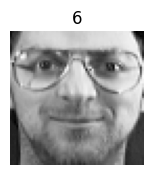

cluster_id 109


In [133]:
import numpy as np
import matplotlib.pyplot as plt

def plot_faces(faces, labels, n_cols=5):
    n_rows = len(faces) // n_cols + (1 if len(faces) % n_cols > 0 else 0)
    plt.figure(figsize=(2 * n_cols, 2 * n_rows))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("cluster_id", cluster_id)
    clc = best_model.labels_ == cluster_id
    faces = X_train[clc]
    labels = y_train[clc]
    
    # Example assuming images are 64x64 pixels
    faces = faces.reshape(-1, 64, 64)
    
    plot_faces(faces, labels)


### 11.Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set.

In [134]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=115, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_valid, y_valid)


0.9375

### Exercise: Next, use K-Means as a dimensionality reduction tool, and train a classifier on the reduced set.

In [135]:
X_train_reduced = best_model.transform(X_train)
X_valid_reduced = best_model.transform(X_valid)
X_test_reduced = best_model.transform(X_test)

clf = RandomForestClassifier(n_estimators=110, random_state=42)
clf.fit(X_train_reduced, y_train)
    
clf.score(X_valid_reduced, y_valid)

0.8

### Exercise: Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach?

In [136]:
from sklearn.pipeline import Pipeline

for n_clusters in range(5,250,5):
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=42)),
        ("forest_clf", RandomForestClassifier(n_estimators=110, random_state=42))
    ])
    pipeline.fit(X_train, y_train)
    print(n_clusters, pipeline.score(X_valid, y_valid))
    # best score with 175 estimators and its 86

5 0.55
10 0.6625
15 0.7
20 0.75
25 0.75
30 0.7375
35 0.7625
40 0.7375
45 0.75
50 0.7625
55 0.7375
60 0.75
65 0.8
70 0.75
75 0.7875
80 0.8125
85 0.7875
90 0.8
95 0.8125
100 0.8375
105 0.8375
110 0.8
115 0.85
120 0.85
125 0.7875
130 0.8
135 0.8125
140 0.8
145 0.775
150 0.7875
155 0.8
160 0.8375
165 0.8375
170 0.85
175 0.8625
180 0.8125
185 0.8625
190 0.8375
195 0.7875
200 0.8
205 0.825
210 0.8125
215 0.825
220 0.8125
225 0.8125
230 0.85
235 0.8125
240 0.8
245 0.8375


### Exercise: Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset's dimensionality (e.g., use PCA, preserving 99% of the variance).

In [154]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

pca = PCA(0.99) # 99 variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)
X_valid_pca = pca.fit_transform(X_valid)


In [171]:
gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

In [172]:
pca.n_components_

69

### Use the model to generate some new faces and visualize them.

In [173]:
# Generate new faces with the GMM
number_faces = 20
new_faces, y_new_faces = gm.sample(n_samples=number_faces)
print("new_faces shape:", new_faces.shape)


new_faces shape: (20, 199)


In [183]:
# Transform new_faces to PCA space
gm_faces = pca.inverse_transform(new_faces)

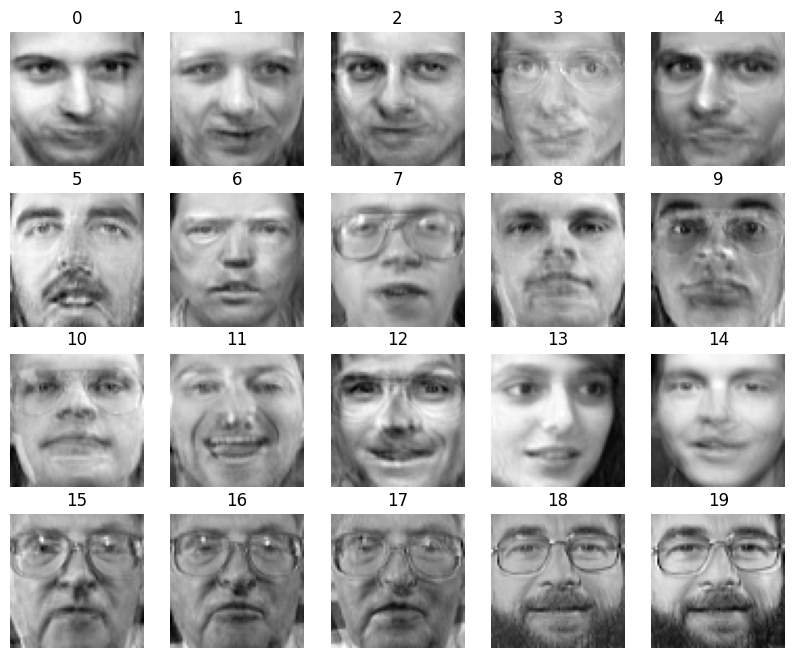

In [187]:

# Function to plot faces
def test(faces, labels, n_cols=5):
    n_rows = len(faces) // n_cols + (1 if len(faces) % n_cols > 0 else 0)
    plt.figure(figsize=(2 * n_cols, 2 * n_rows))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        face_reshaped = face.reshape(64, 64)  # Adjust dimensions as per your image size
        plt.imshow(face_reshaped, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

y_new_faces = np.arange(len(gm_faces))

test(gm_faces, y_new_faces)
